# 2. models and parameters

Now that we know how to import our scattering data, we can begin to consider which model we want to use to analyze the data. In this notebook we review the different SasView/sasmodels models available and how to access the available parameters for each model.

In [3]:
from bumps.names import Parameter
from bumps.fitters import fit

import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

import sasmodels
from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment

import bumps

# uncomment and edit line below to add path to the sasview source code
# sys.path.append("/path/to/sasview/src")
import sas

A list of included models can be accessed using the `sasmodels.core` module:

In [4]:
sasmodels.core.list_models()

['adsorbed_layer',
 'barbell',
 'bcc_paracrystal',
 'be_polyelectrolyte',
 'binary_hard_sphere',
 'broad_peak',
 'capped_cylinder',
 'core_multi_shell',
 'core_shell_bicelle',
 'core_shell_bicelle_elliptical',
 'core_shell_bicelle_elliptical_belt_rough',
 'core_shell_cylinder',
 'core_shell_ellipsoid',
 'core_shell_parallelepiped',
 'core_shell_sphere',
 'correlation_length',
 'cylinder',
 'dab',
 'ellipsoid',
 'elliptical_cylinder',
 'fcc_paracrystal',
 'flexible_cylinder',
 'flexible_cylinder_elliptical',
 'fractal',
 'fractal_core_shell',
 'fuzzy_sphere',
 'gauss_lorentz_gel',
 'gaussian_peak',
 'gel_fit',
 'guinier',
 'guinier_porod',
 'hardsphere',
 'hayter_msa',
 'hollow_cylinder',
 'hollow_rectangular_prism',
 'hollow_rectangular_prism_thin_walls',
 'lamellar',
 'lamellar_hg',
 'lamellar_hg_stack_caille',
 'lamellar_stack_caille',
 'lamellar_stack_paracrystal',
 'line',
 'linear_pearls',
 'lorentz',
 'mass_fractal',
 'mass_surface_fractal',
 'mono_gauss_coil',
 'multilayer_vesic

For this example, we are going to take a deeper look at the sphere model, which is described in more detail in the SasView documentation at http://www.sasview.org/docs/user/models/sphere.html. You can access a model by its name and the `load_model` function, which creates a sasmodels kernel.

In [5]:
kernel = sasmodels.core.load_model("sphere")

In [6]:
kernel.info.title

'Spheres with uniform scattering length density'

In [7]:
kernel.info.description

'P(q)=(scale/V)*[3V(sld-sld_solvent)*(sin(qr)-qr cos(qr))\n                /(qr)^3]^2 + background\n    r: radius of sphere\n    V: The volume of the scatter\n    sld: the SLD of the sphere\n    sld_solvent: the SLD of the solvent\n'

In [8]:
kernel.info.docs

'\nFor information about polarised and magnetic scattering, see\nthe :ref:`magnetism` documentation.\n\nDefinition\n----------\n\nThe 1D scattering intensity is calculated in the following way (Guinier, 1955)\n\n.. math::\n\n    I(q) = \\frac{\\text{scale}}{V} \\cdot \\left[\n        3V(\\Delta\\rho) \\cdot \\frac{\\sin(qr) - qr\\cos(qr))}{(qr)^3}\n        \\right]^2 + \\text{background}\n\nwhere *scale* is a volume fraction, $V$ is the volume of the scatterer,\n$r$ is the radius of the sphere and *background* is the background level.\n*sld* and *sld_solvent* are the scattering length densities (SLDs) of the\nscatterer and the solvent respectively, whose difference is $\\Delta\\rho$.\n\nNote that if your data is in absolute scale, the *scale* should represent\nthe volume fraction (which is unitless) if you have a good fit. If not,\nit should represent the volume fraction times a factor (by which your data\nmight need to be rescaled).\n\nThe 2D scattering intensity is the same as above,

The next step is to use our kernel to create a `bumps` model that enables use of the `bumps` fitting procedures. The sasmodels kernel includes the functional form of the equation and relationship between the parameters, while the `bumps` model creates a fitting function with the appropriate parameters extracted from the kernel. The `sasmodels` package contains a `bumps` module that interfaces with the `bumps` package:

In [9]:
model = sasmodels.bumps_model.Model(model=kernel)

A `bumps` model includes all the different parameters as attributes of the model object, as well as a dictionary of all available parameters. This dictionary does exclude the polydispersity type.

In [10]:
model.parameters()

{'scale': Parameter(scale),
 'background': Parameter(background),
 'sld': Parameter(sld),
 'sld_solvent': Parameter(sld_solvent),
 'radius': Parameter(radius),
 'radius_pd': Parameter(radius_pd),
 'radius_pd_n': Parameter(radius_pd_n),
 'radius_pd_nsigma': Parameter(radius_pd_nsigma),
 'up_frac_i': Parameter(up_frac_i),
 'up_frac_f': Parameter(up_frac_f),
 'up_angle': Parameter(up_angle),
 'sld_M0': Parameter(sld_M0),
 'sld_mtheta': Parameter(sld_mtheta),
 'sld_mphi': Parameter(sld_mphi),
 'sld_solvent_M0': Parameter(sld_solvent_M0),
 'sld_solvent_mtheta': Parameter(sld_solvent_mtheta),
 'sld_solvent_mphi': Parameter(sld_solvent_mphi)}

One can additionally print out a dictionary of all parameters and their current values, including the polydispersity type.

In [11]:
model.state()

{'scale': 1,
 'background': 0.001,
 'sld': 1,
 'sld_solvent': 6,
 'radius': 50,
 'radius_pd': 0.0,
 'radius_pd_n': 35.0,
 'radius_pd_nsigma': 3.0,
 'up_frac_i': 0.0,
 'up_frac_f': 0.0,
 'up_angle': 0.0,
 'sld_M0': 0.0,
 'sld_mtheta': 0.0,
 'sld_mphi': 0.0,
 'sld_solvent_M0': 0.0,
 'sld_solvent_mtheta': 0.0,
 'sld_solvent_mphi': 0.0,
 'radius_pd_type': 'gaussian'}

Each parameter of the model is represented by a `bumps` Parameter object that includes relevant meta-data that defines the constant/initial value and fitting range of the parameter.

In [12]:
model.radius

Parameter(radius)

In [13]:
"""
absolute limits of the radius parameter
useful when considering polydisperse systems
the 'limits' attribute ensures that the polydisperse distribution
does not result in infeasible values (e.g. negative radius)
"""

model.radius.limits

(0.0, inf)

In [14]:
"""
current value of the parameter
right now this is the default value
"""
model.radius.value

50

In [15]:
"""
fitting range for this parameter
in this example we give a uniform range from 10 to 50 Angstroms for the radius to fluctuate
"""

model.radius.range = (10,100)
model.radius.range

(10, 100)

In [16]:
"""
we could also apply 'bounds' to specify a fitting range with specific distribution
in this example we've created a normal distribution centered at a mean value of 50
this is useful if you want to penalize fitting parameters far from a somewhat known value
"""

model.radius.bounds = bumps.bounds.Normal(mean=50, std=1)

In [17]:
"""
the default name of the parameter is it's variable name, i.e. radius name is radius
this can also be customized in your model depending on your system
"""

print(model.radius.name)
model.radius.name = 'gold radius' 
print(model.radius.name)

radius
gold radius


For certain parameters, a polydispersity (pd) distribution can be defined. The different pd forms are described at: http://www.sasview.org/docs/user/qtgui/Perspectives/Fitting/pd/polydispersity.html

In [18]:
print(model.radius_pd_type) # default is gaussian
model.radius_pd_type = 'lognormal'
print(model.radius_pd_type)

gaussian
lognormal


In [19]:
model.radius_pd.value = 0.5 # default value is 0, we will set some polydispersity here

In [20]:
model.state()

{'scale': 1,
 'background': 0.001,
 'sld': 1,
 'sld_solvent': 6,
 'radius': 50,
 'radius_pd': 0.5,
 'radius_pd_n': 35.0,
 'radius_pd_nsigma': 3.0,
 'up_frac_i': 0.0,
 'up_frac_f': 0.0,
 'up_angle': 0.0,
 'sld_M0': 0.0,
 'sld_mtheta': 0.0,
 'sld_mphi': 0.0,
 'sld_solvent_M0': 0.0,
 'sld_solvent_mtheta': 0.0,
 'sld_solvent_mphi': 0.0,
 'radius_pd_type': 'lognormal'}

The `sasmodels.weights` module can be used to extract the polydispersity distribution for the relevant parameters. In this example, we can look at the distribution of sphere radius based on our current value for the polydispersity.

In [21]:
pd_dist = sasmodels.weights.LogNormalDispersion(
    npts=model.radius_pd_n.value,
    nsigmas=model.radius_pd_nsigma.value,
    width=model.radius_pd.value
).get_weights(
    center=model.radius.value,
    lb=0,
    ub=1000,
    relative=True
)


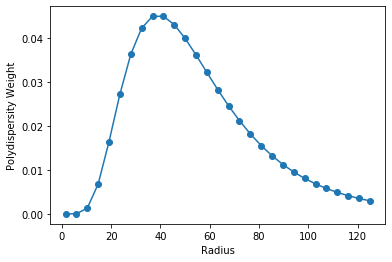

In [22]:
plt.errorbar(pd_dist[0],pd_dist[1],fmt='o-')
plt.xlabel('Radius')
plt.ylabel('Polydispersity Weight')
plt.show()

When setting up the `bumps` model, it's also possible to directly set the parameters at their initial values and fitting ranges with the following approach. Any parameters not specified in the `Model` function are set at their default values.

In [28]:
radius = bumps.names.Parameter(55, limits=(0,bumps.names.inf), name='gold radius')
radius.bounds = bumps.bounds.Normal(mean=50, std=1)

radius_pd = bumps.names.Parameter(0.5)
radius_pd_type = 'lognormal'


model = Model(
    model=kernel,
    radius=radius,
    radius_pd=radius_pd,
    radius_pd_type=radius_pd_type,
)

In [29]:
model.radius.value

55